In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
import tweepy as tw
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
consumer_key = 'YNyiyE5ibJ86TbhBDoFCpEsBu'
consumer_secret = 'cE63ZCAiiNBYogYUNwjwGgB2jOVBxvZkkPOfwm7SPMa6Eocb6V'
access_token = '748789075-E190Pda4cc7GQr4KQyUczGy9QtoMMPiSEkEm5uKP'
access_token_secret = 'aAlExkHR84ij1SQpw3wZpsBg1WCNxYv5yUWchyDHya8YN'

In [3]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
cursor = tw.Cursor(api.user_timeline, screen_name = 'tedcruz', tweet_mode = "extended").items(3000)

In [5]:
tweets = [{'Tweet':tweet.full_text} for tweet in cursor]
#print(tweets)

In [6]:
df_tweet = pd.DataFrame.from_dict(tweets)
df_tweet.head()

,Tweet
0,RT @thehill: WATCH: Fight breaks out between S...
1,RT @goodblackdude: Ted Cruz calls AOC an angry...
2,RT @trish_regan: This is a bit unseemly. The s...
3,Your facts have no place in their lying propag...
4,The corrupt corporate media isn't interested i...


In [7]:

from nltk.corpus import stopwords
nltk.download('stopwords')

# Import textblob
from textblob import Word, TextBlob



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words = stopwords.words('english')
custom_stopwords = ['RT','amp']

In [9]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df_tweet.head()

,Tweet
0,@thehill: WATCH: Fight break Sen. Ted Cruz Sen...
1,@goodblackdude: Ted Cruz call AOC angry Left-w...
2,@trish_regan: This bit unseemly. The son law G...
3,Your fact place lying propaganda. https://t.co...
4,The corrupt corporate medium interested report...


In [10]:
df1 = df_tweet.to_string()

df_split = df1.split()

df_split

all_sentences = []

for word in df_split:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [11]:
# #print(lines)
# def cleaning_URLs(data):
#     return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
# dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
# dataset['text'].tail()

In [12]:
lines = [re.sub(r'[^A-Za-z0-9]+((www.[^s]+)|(https?://[^s]+))', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        word = word.lower()
        lines2.append(word)
            

In [13]:
# #This is stemming the words to their root
# from nltk.stem.snowball import SnowballStemmer

# # The Snowball Stemmer requires that you pass a language parameter
# s_stemmer = SnowballStemmer(language='english')

# stem = []
# for word in lines2:
#     stem.append(s_stemmer.stem(word))
    
# #stem

In [14]:
#Removing all Stop Words

stem2 = []

stem = lines2 # Remove this if you want stemming

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

#stem2

In [15]:
df_count = pd.DataFrame(stem2)

df_count = df_count[0].value_counts()

In [16]:
df_count.head()

biden    475
ted      419
cruz     386
&amp;    382
sen.     215
Name: 0, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

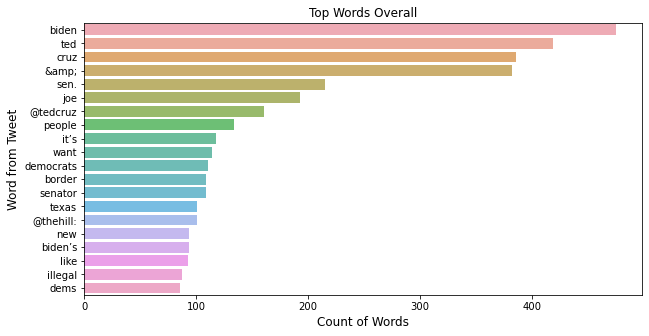

In [19]:

#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df_count = df_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x = df_count.values, y = df_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [20]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [21]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [22]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

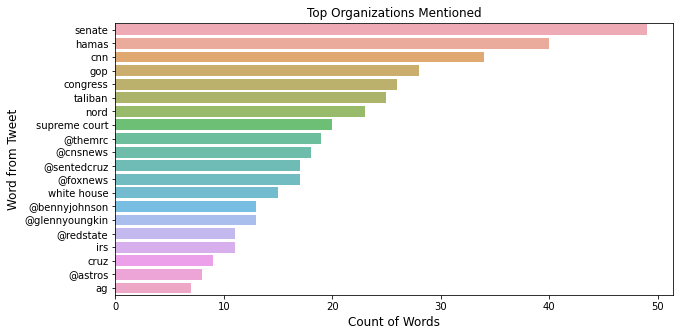

In [23]:
df_count = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x = df_count.values, y= df_count.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [24]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

C:\Users\akhil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\akhil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\akhil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\akhil\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


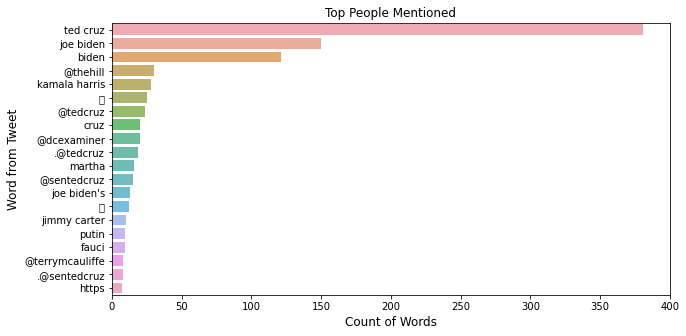

In [25]:
df_count = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x = df_count.values, y = df_count.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [26]:
df_tweet.head()

,Tweet
0,@thehill: WATCH: Fight break Sen. Ted Cruz Sen...
1,@goodblackdude: Ted Cruz call AOC angry Left-w...
2,@trish_regan: This bit unseemly. The son law G...
3,Your fact place lying propaganda. https://t.co...
4,The corrupt corporate medium interested report...


In [27]:
df_tweet['polarity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweet['subjectivity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [28]:
df_tweet.head()

,Tweet,polarity,subjectivity
0,@thehill: WATCH: Fight break Sen. Ted Cruz Sen...,-0.125000,0.125000
1,@goodblackdude: Ted Cruz call AOC angry Left-w...,-0.031250,0.825000
2,@trish_regan: This bit unseemly. The son law G...,0.000000,0.000000
3,Your fact place lying propaganda. https://t.co...,-0.100000,0.100000
4,The corrupt corporate medium interested report...,0.058333,0.538889


In [29]:
def getAnalysis(score):
    if score < 0:
        return '‘Negative’'
    elif score == 0:
        return '‘Neutral’'
    else:
        return '‘Positive’'
df_tweet['TextBlob_Analysis'] = df_tweet['polarity'].apply(getAnalysis)

In [30]:
df_tweet.head()

,Tweet,polarity,subjectivity,TextBlob_Analysis
0,@thehill: WATCH: Fight break Sen. Ted Cruz Sen...,-0.125000,0.125000,‘Negative’
1,@goodblackdude: Ted Cruz call AOC angry Left-w...,-0.031250,0.825000,‘Negative’
2,@trish_regan: This bit unseemly. The son law G...,0.000000,0.000000,‘Neutral’
3,Your fact place lying propaganda. https://t.co...,-0.100000,0.100000,‘Negative’
4,The corrupt corporate medium interested report...,0.058333,0.538889,‘Positive’


In [31]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tweet              3000 non-null   object 
 1   polarity           3000 non-null   float64
 2   subjectivity       3000 non-null   float64
 3   TextBlob_Analysis  3000 non-null   object 
dtypes: float64(2), object(2)
memory usage: 93.9+ KB


In [32]:
df_tweet_count = df_tweet['TextBlob_Analysis'].value_counts()

In [33]:
df_tweet_count

‘Neutral’     1324
‘Positive’    1031
‘Negative’     645
Name: TextBlob_Analysis, dtype: int64

In [34]:
df_tweet['polarity'].mean()

0.03899044013333444

In [35]:
df_tweet['subjectivity'].mean()

0.33647918873454585